<h1 style="font-size:50px">
Credit Card Fraud Detection EDA
</h1>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.<br/>
Here we have the data consisting of transactions made by credit card and some features related to that. These features can be helpful in understanding the nature and frequency of frauds and thus reduce any mishap to the customers in future.<br/>
So in this notebook we have performed an expensive exploratory data analysis.<br/><br/>

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h2 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📜 Data Information
            </h2>
            <p style="font-size:14px;
                      padding:0px 10px 20px 10px;">
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have <b>492 frauds out of 284,807 transactions</b>.<br/><br/>
⚠ The dataset is highly unbalanced, the <b>positive class (frauds) account for 0.172%</b> of all transactions. Due to confidentiality issues, we cannot provide the original features and more background information about the data.<br/><br/>
Features <b>V1, V2, … V28 are the principal components obtained with PCA</b>, the only features which have not been transformed with PCA are 'Time' and 'Amount'.<br/>
Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.<br/>
The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.<br/>
Feature <b>'Class' is the response variable</b> and it takes value 1 in case of fraud and 0 otherwise.
            </p>
</div>

## Imports

In [1]:
# Imports
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plotly.offline.init_notebook_mode (connected = True)

import ipywidgets as widgets

# Colors used
colors = ['#FF5851', '#3d9dfc', '#d852fa', '#494a49', '#212121' , '#ffffff', '#727372', '#03fc39']

## Data

In [2]:
# Reading Data
df = pd.read_csv("/content/creditcard.csv")
print(df.shape)
df.head(2)

(25838, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [3]:
# Data column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25838 entries, 0 to 25837
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    25838 non-null  int64  
 1   V1      25838 non-null  float64
 2   V2      25838 non-null  float64
 3   V3      25837 non-null  float64
 4   V4      25837 non-null  float64
 5   V5      25837 non-null  float64
 6   V6      25837 non-null  float64
 7   V7      25837 non-null  float64
 8   V8      25837 non-null  float64
 9   V9      25837 non-null  float64
 10  V10     25837 non-null  float64
 11  V11     25837 non-null  float64
 12  V12     25837 non-null  float64
 13  V13     25837 non-null  float64
 14  V14     25837 non-null  float64
 15  V15     25837 non-null  float64
 16  V16     25837 non-null  float64
 17  V17     25837 non-null  float64
 18  V18     25837 non-null  float64
 19  V19     25837 non-null  float64
 20  V20     25837 non-null  float64
 21  V21     25837 non-null  float64
 22

In [4]:
# Data statistical description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,25838.0,19376.128532,11653.899424,0.000000,7694.750000,22684.000000,30231.500000,33787.000000
V1,25838.0,-0.225653,1.889055,-30.552380,-0.951266,-0.267973,1.166499,1.960497
V2,25838.0,0.166976,1.552796,-40.978852,-0.405158,0.176509,0.818206,16.713389
V3,25837.0,0.723131,1.684909,-31.103685,0.279675,0.862364,1.489349,4.101716
V4,25837.0,0.229368,1.434242,-5.172595,-0.683788,0.204882,1.109950,13.143668
V5,25837.0,-0.194354,1.436206,-42.147898,-0.779682,-0.224921,0.320600,34.099309
V6,25837.0,0.079800,1.323018,-23.496714,-0.662365,-0.179636,0.466671,22.529298
V7,25837.0,-0.128669,1.319114,-26.548144,-0.594982,-0.067756,0.446339,36.677268
V8,25837.0,0.026060,1.341622,-41.484823,-0.164442,0.029393,0.287518,20.007208
V9,25837.0,0.441922,1.269785,-7.175097,-0.384700,0.358908,1.200785,10.392889


In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📝 Data Insights
            </h3>
    <ul>
        <li style="padding:0px 0px 5px 0px;">All the feature variables are numerical.</li>
        <li style="padding:0px 0px 5px 0px;">There were total <b>284807 transaction</b> over a time span of 172792 seconds i.e. <b>2 days</b> with a max transaction amount upto <b>25691.16</b> units.</li>
        <li style="padding:0px 0px 10px 0px;">There are no missing values in the data.</li>
    </ul>
            
</div>

## Exploratory Data Analysis

In [6]:
# Making a copy of dataframe for EDA
df_eda = df.copy()
df_eda["Hours"] = round(df['Time']/3600)

**As mentioned in the data information, the data is highly imbalanced. So let's check on our own the class distribution.**

In [7]:
# Pie chart
fig = go.Figure(data=[go.Pie(labels=["Non Fraud", "Fraud"], values=df_eda['Class'].value_counts(), pull=[0, 0.2])])
fig.update_layout(title_text="Fraud-Non Fraud (Class) Distribution", plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_traces(marker=dict(colors=[colors[1], colors[0]]))
fig.show()

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            ✏ Note
            </h3>
    <p style="padding:0px 0px 10px 10px;">
        The data is <b>very imbalanced</b> and to tackle this problem we can do minority class oversampling or majority class undersampling to the train set which we will use for training the machine learning model.<br/>
        We can also try using some boosting models like <b>XGBoost</b> that can help handle class imbalance.<br/>
        And for this problem we can use <b>precision/recall</b> metrics to effectively measure our model performance.
    </p>
    
</div>    

**Now let's see the frequency of valid and fraud transactions over time.**

In [8]:
# Transaction count with non frauds over time(Hours)
count_0 = df_eda[df_eda['Class']==0].groupby('Hours').count()["Class"]

# Transaction count with frauds over time(Hours)
count_1 = df_eda[df_eda['Class']==1].groupby('Hours').count()["Class"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
counts_df["ratio"] = (counts_df["Class 1"]/counts_df["Class 0"]).fillna(0)

# Removing inf values generated due to (0/0)
df_counts = counts_df[counts_df['ratio'] != np.inf].reset_index()

# Subplots
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Non Frauds","Frauds", "Ratio of (Frauds / Non Frauds)"))


fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : colors[1]}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : colors[0]}),
                 row=1, col=2)
fig.add_trace(go.Scatter(x=df_counts["Hours"], y=df_counts["ratio"], name="Transactions", marker = {'color' : colors[2]}),
                 row=2, col=1)

# Layout and axes configs
fig.update_layout(showlegend=False, title_text="Transactions Over Time", height=650, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_xaxes(gridcolor=colors[6], color = colors[5])
fig.update_yaxes(gridcolor=colors[6], color = colors[5])

# Axes labels
fig['layout']['xaxis']['title']='Hour'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Hour'
fig['layout']['yaxis2']['title']='Transaction'
fig['layout']['xaxis3']['title']='Hour'
fig['layout']['yaxis3']['title']='Fraud / Non Fraud (Transaction)'

fig.show()

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📝 Insights
            </h3>
    <p style="padding:0px 0px 10px 10px;">
        Transaction with fraud have has an overall uniform occurance with irregular ups and downs, while valid transactions shows some kind of <b>seasonality</b> over a period of <b>24 hours</b>.<br/>
        The lower graph also shows that though there are almost valid transaction in majority, but the ratio of fraudulent to valid transaction show <b>peak after 12 am</b>.<br/>
        So majority of frauds are usually happening after or during midnight hours.
    </p>
    
</div>    

**Let's see the transaction amount of valid and fraudulent transaction; and also the ratio of counts of fraudulent to valid transaction for a given amount.**

In [9]:
# Transaction count with non frauds over Amount
amount_0 = df_eda[df_eda['Class']==0].groupby('Amount').count()["Class"]

# Transaction count with frauds over Amount
amount_1 = df_eda[df_eda['Class']==1].groupby('Amount').count()["Class"]

# Concatenate
amounts_df = pd.concat([amount_0, amount_1], axis=1, keys=["Class 0", "Class 1"])
amounts_df["ratio"] = (amounts_df["Class 1"]/amounts_df["Class 0"])

# Removing inf values generated due to (0/0)
df_amounts = amounts_df[amounts_df['ratio'] != np.inf].reset_index()

# Subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{}, {}]],
    subplot_titles=("Non Frauds","Frauds"))


fig.add_trace(go.Scatter(x=df_amounts["Amount"], y=df_amounts["Class 0"], mode='markers', marker_opacity=0.65, name="Transactions", marker = {'color' : colors[1]}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_amounts["Amount"], y=df_amounts["Class 1"], mode='markers', marker_opacity=0.65, name="Transactions", marker = {'color' : colors[0]}),
                 row=1, col=2)

fig2 = px.scatter(x=df_amounts["Amount"], y=df_amounts["ratio"], trendline="lowess")

# Layout and axes configs
fig.update_layout(showlegend=False, title_text="Transaction Amount",height=350, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5])
fig.update_xaxes(range=[-100, 2500], gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])

fig2.update_layout(showlegend=False, title_text="Frauds over Amount: Ratio of Frauds/Non Frauds",height=400, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Amount", yaxis_title="Fraud / Non Fraud (Transaction)")
fig2.update_traces(line_color=colors[7], marker_color=colors[2])
fig2.update_xaxes(range=[-50, 1500], gridcolor=colors[6], color = colors[5], zerolinecolor=colors[6])
fig2.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

# Axes labels
fig['layout']['xaxis']['title']='Amount'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Amount'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()
fig2.show()

<div style="border-left: 5px solid;
            border-color: rgba(255, 88, 81, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(255, 88, 81, 0.2)">
            <h3 style="background-color: rgba(255, 88, 81, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            ✏ Note
            </h3>
    <p style="padding:0px 0px 10px 10px;">
        The amounts which were not common for both classes were dropped, hence the lower plot with trendline is a very rough estimate to the fraudulent trend over amount.<br/>
        Even from the graph itself, there seems to be <b>little to no correlation</b> between fraudulent transaction and the transaction amount.
    </p>
    
</div>    

**Now let's check out the minimum maximum and mean value of the features generated using PCA.**

In [10]:
fig = go.Figure()

# Lines joining Max-Mean-Min
for row in df.describe().T.index[1:-2]:
    if df.describe().T['min'][row]!=df.describe().T['max'][row]:
        fig.add_shape(
            dict(type="line",
                 x0=row,
                 x1=row,
                 y0=df.describe().T['min'][row],
                 y1=df.describe().T['max'][row],
                 line=dict(
                   color=colors[2],
                   width=4)
                )
        )

# Min point
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['min'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="min",
                         marker=dict(color=colors[7],
                                     size=7.5)))

# Mean point
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['mean'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="mean",
                         marker=dict(color=colors[7],
                                     size=9)))

# Max point
fig.add_trace(go.Scatter(x=df.describe().T.index[1:-2],
                         y=df.describe().T['max'][1:-2],
                         mode="markers",
                         showlegend=False,
                         name="max",
                         marker=dict(color=colors[7],
                                     size=7.5)))

# layout and axes configs
fig.update_layout(title="Max-Mean-Min Graph", title_x=0.5, height=600, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="PCA Feature", yaxis_title="Value")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

fig.show()

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📝 Insights
            </h3>
    <p style="padding:0px 0px 10px 10px;">
        The mean values of every features are very close to <b>zero</b>.<br/>
        Also most of the feature value ranges between <b>-50 to 50.</b>
    </p>
    
</div>    

**Let's Analyze more these features more with density plot.**

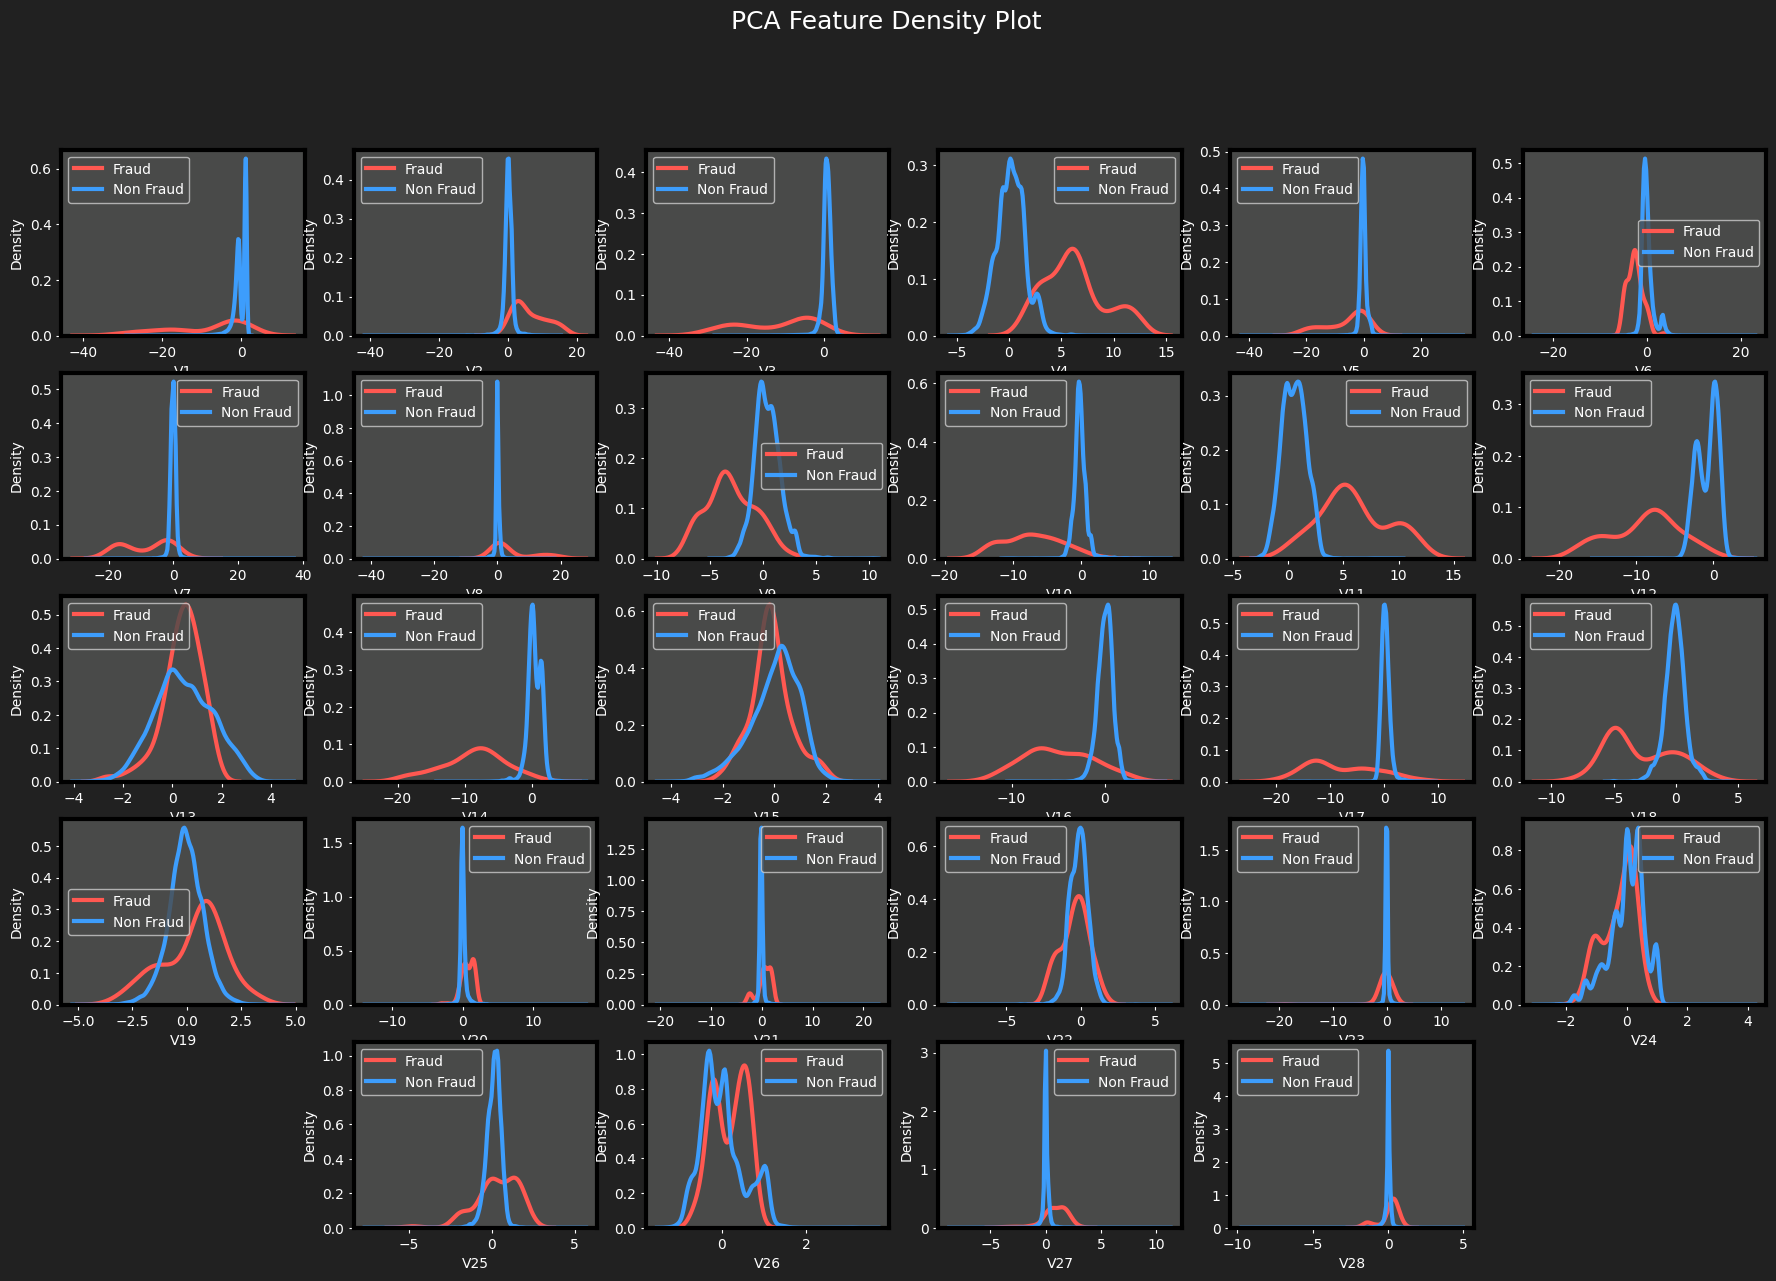

In [11]:
fig = plt.figure(figsize=(22, 14))
fig.tight_layout(pad=3.0)

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
plt.rcParams["text.color"] = colors[5]
plt.rcParams["figure.titlesize"] = 18
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Density Plot")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >=25:
        idx += 1

    plt.subplot(5, 6, idx+1)
    sns.kdeplot(x=df_eda[df_eda['Class'] == 1][i], linewidth=3, color=colors[0])
    sns.kdeplot(x=df_eda[df_eda['Class'] == 0][i], linewidth=3, color=colors[1])

    plt.legend(labels=['Fraud', 'Non Fraud'])

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📝 Insights
            </h3>
    <ul>
        <li style="padding:0px 0px 5px 0px;">For all the feature variables the distribution is centered around 0 for valid transaction.</li>
        <li style="padding:0px 0px 5px 0px;"><b>V11 ,V12, V14, V17</b> have a clearly separable distribution while <b>V3, V4, V10, V16</b> shows mild separability in their density plots.</li>
        <li style="padding:0px 0px 5px 0px;">The feature distributions for valid transaction have a very <b>sharp peak aoround 0</b> whereas the distributions for fradulent transaction are mostly <b>skewed</b> and are <b>wide spread</b>.</li>
    </ul>
            
</div>

### Outliers present in data

In [12]:
# Number of entries with z score > 3 or < -3 for each feature variable
ol_df = (stats.zscore(np.abs(df_eda.iloc[:, 1:-2])) > 3).sum(axis=0).sort_values(ascending=False)

fig = px.bar(x=ol_df.index, y=ol_df)

fig.update_layout(title="Outliers in each Feature (except time features)", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Feature", yaxis_title="Number of Outliers")
fig.update_traces(marker_color=colors[1])
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

In [13]:
# Number of entries with z score > 3 or < -3 for each feature variable and for each class
count = []
df_abs_z_score = pd.concat([stats.zscore(np.abs(df_eda.iloc[:, :-2])), df_eda['Class']], axis=1)
for i in df_eda.iloc[:, :-2].columns:
    count.append(df_abs_z_score[df_abs_z_score.loc[:, i]>3]['Class'].value_counts().values.tolist())

In [14]:
# Creating dataframe to help get data easily for the plot
ol_df2 = pd.DataFrame(count, columns=['Class 0', 'Class 1'], index=df_eda.iloc[:, :-2].columns).sort_values(by='Class 1', ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=ol_df2.index, y=ol_df2['Class 1'], marker_color=colors[0], name="Fraud"))
fig.add_trace(go.Scatter(x=ol_df2.index, y=ol_df2['Class 0'], marker_color=colors[1], name="Non Fraud"))

fig.update_layout(title="Outliers in each Feature: Frauds / Non Frauds", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], xaxis_title="Feature", yaxis_title="Number of Outliers")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

In [15]:
# Percent outliers
ol_df2['Ratio 0'] = (ol_df2['Class 0']/df_eda['Class'].value_counts()[0])
ol_df2['Ratio 1'] = (ol_df2['Class 1']/df_eda['Class'].value_counts()[1])
ol_df2['Percent 0'] = (ol_df2['Ratio 0']/(ol_df2['Ratio 0']+ol_df2['Ratio 1']))
ol_df2['Percent 1'] = (ol_df2['Ratio 1']/(ol_df2['Ratio 0']+ol_df2['Ratio 1']))
ol_df2.sort_values(by='Percent 0', ascending=False, inplace=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=ol_df2['Percent 0']*100, y=ol_df2.index, orientation='h', marker_color=colors[1], name="Non Fraud"))
fig.add_trace(go.Bar(x=ol_df2['Percent 1']*100, y=ol_df2.index, orientation='h', marker_color=colors[0], name="Fraud"))
fig.update_layout(barmode='stack', height=800, title="Percentage Proportion of Outliers", title_x=0.5, plot_bgcolor=colors[3], paper_bgcolor=colors[4], font_color=colors[5], yaxis_title="Feature")
fig.update_xaxes(gridcolor=colors[6], zerolinecolor=colors[6])
fig.update_yaxes(gridcolor=colors[6], zerolinecolor=colors[6])

**Mostly for fraudulent transactions the feature variables seems to have outliers.**

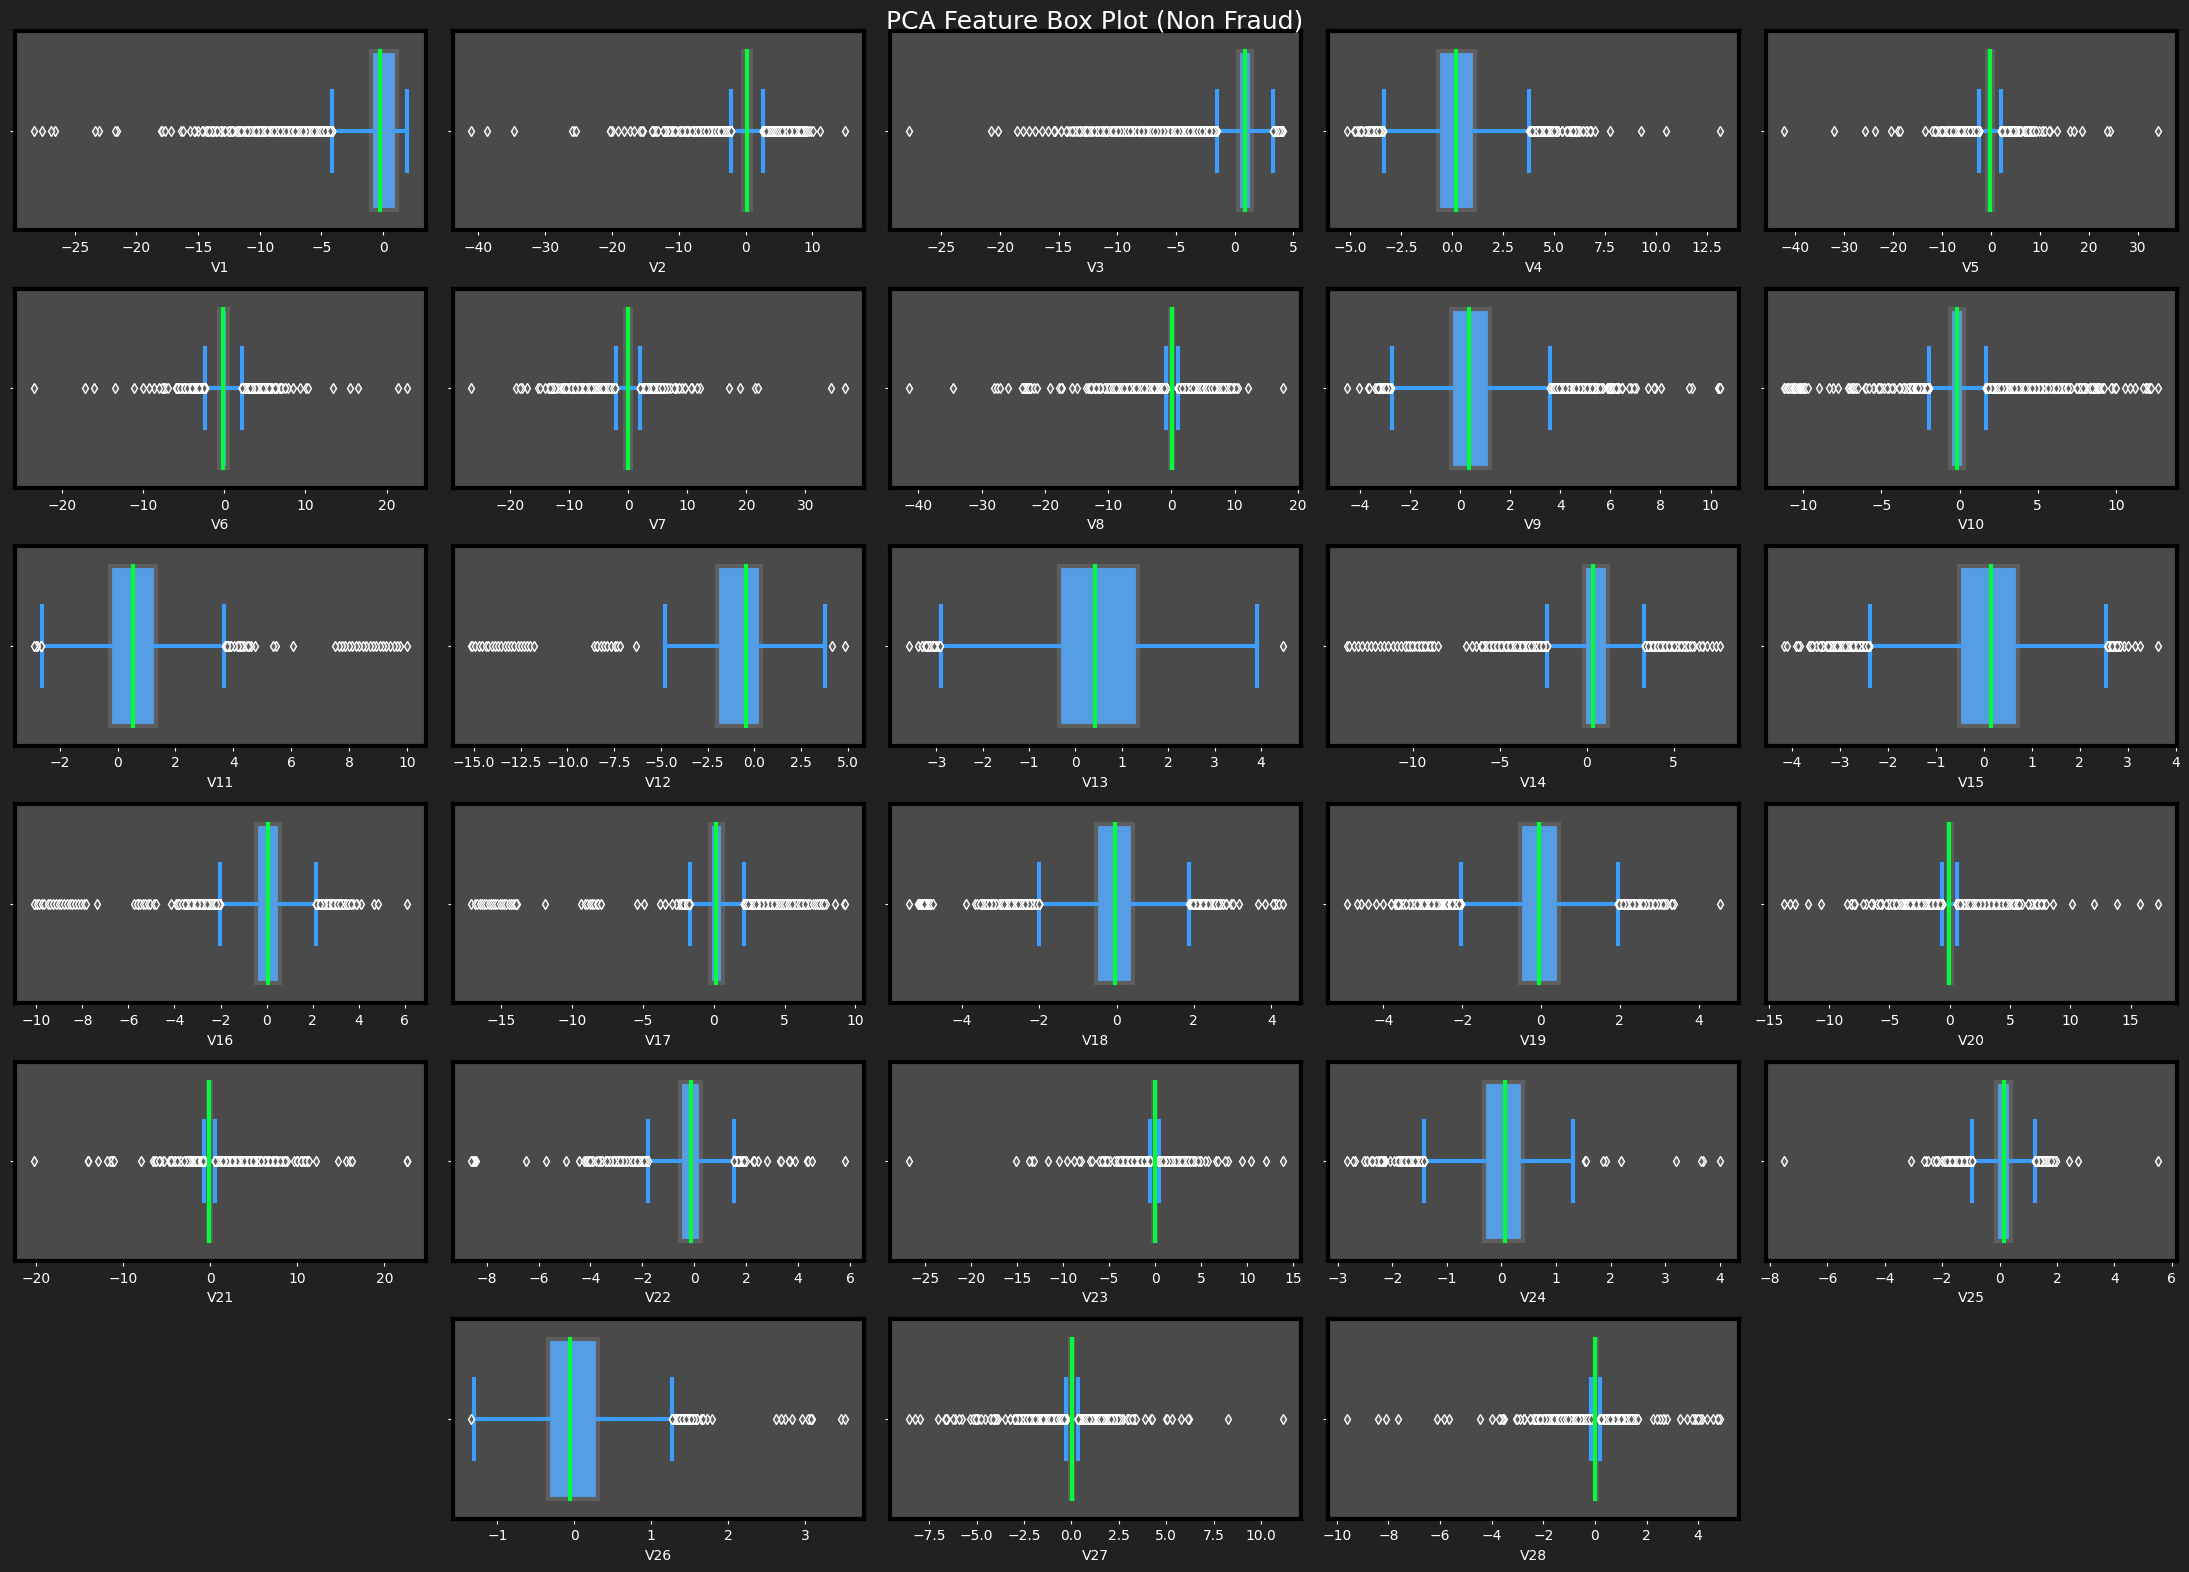

In [16]:
fig = plt.figure(figsize=(22, 16))

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Box Plot (Non Fraud)")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >= 26:
        idx+=1

    plt.subplot(6, 5, idx+1)
    sns.boxplot(x=df_eda[df_eda['Class'] == 0][i], linewidth=3, palette=[colors[1]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[1]}, capprops={'color':colors[1]}, flierprops=dict(markeredgecolor=colors[5]))

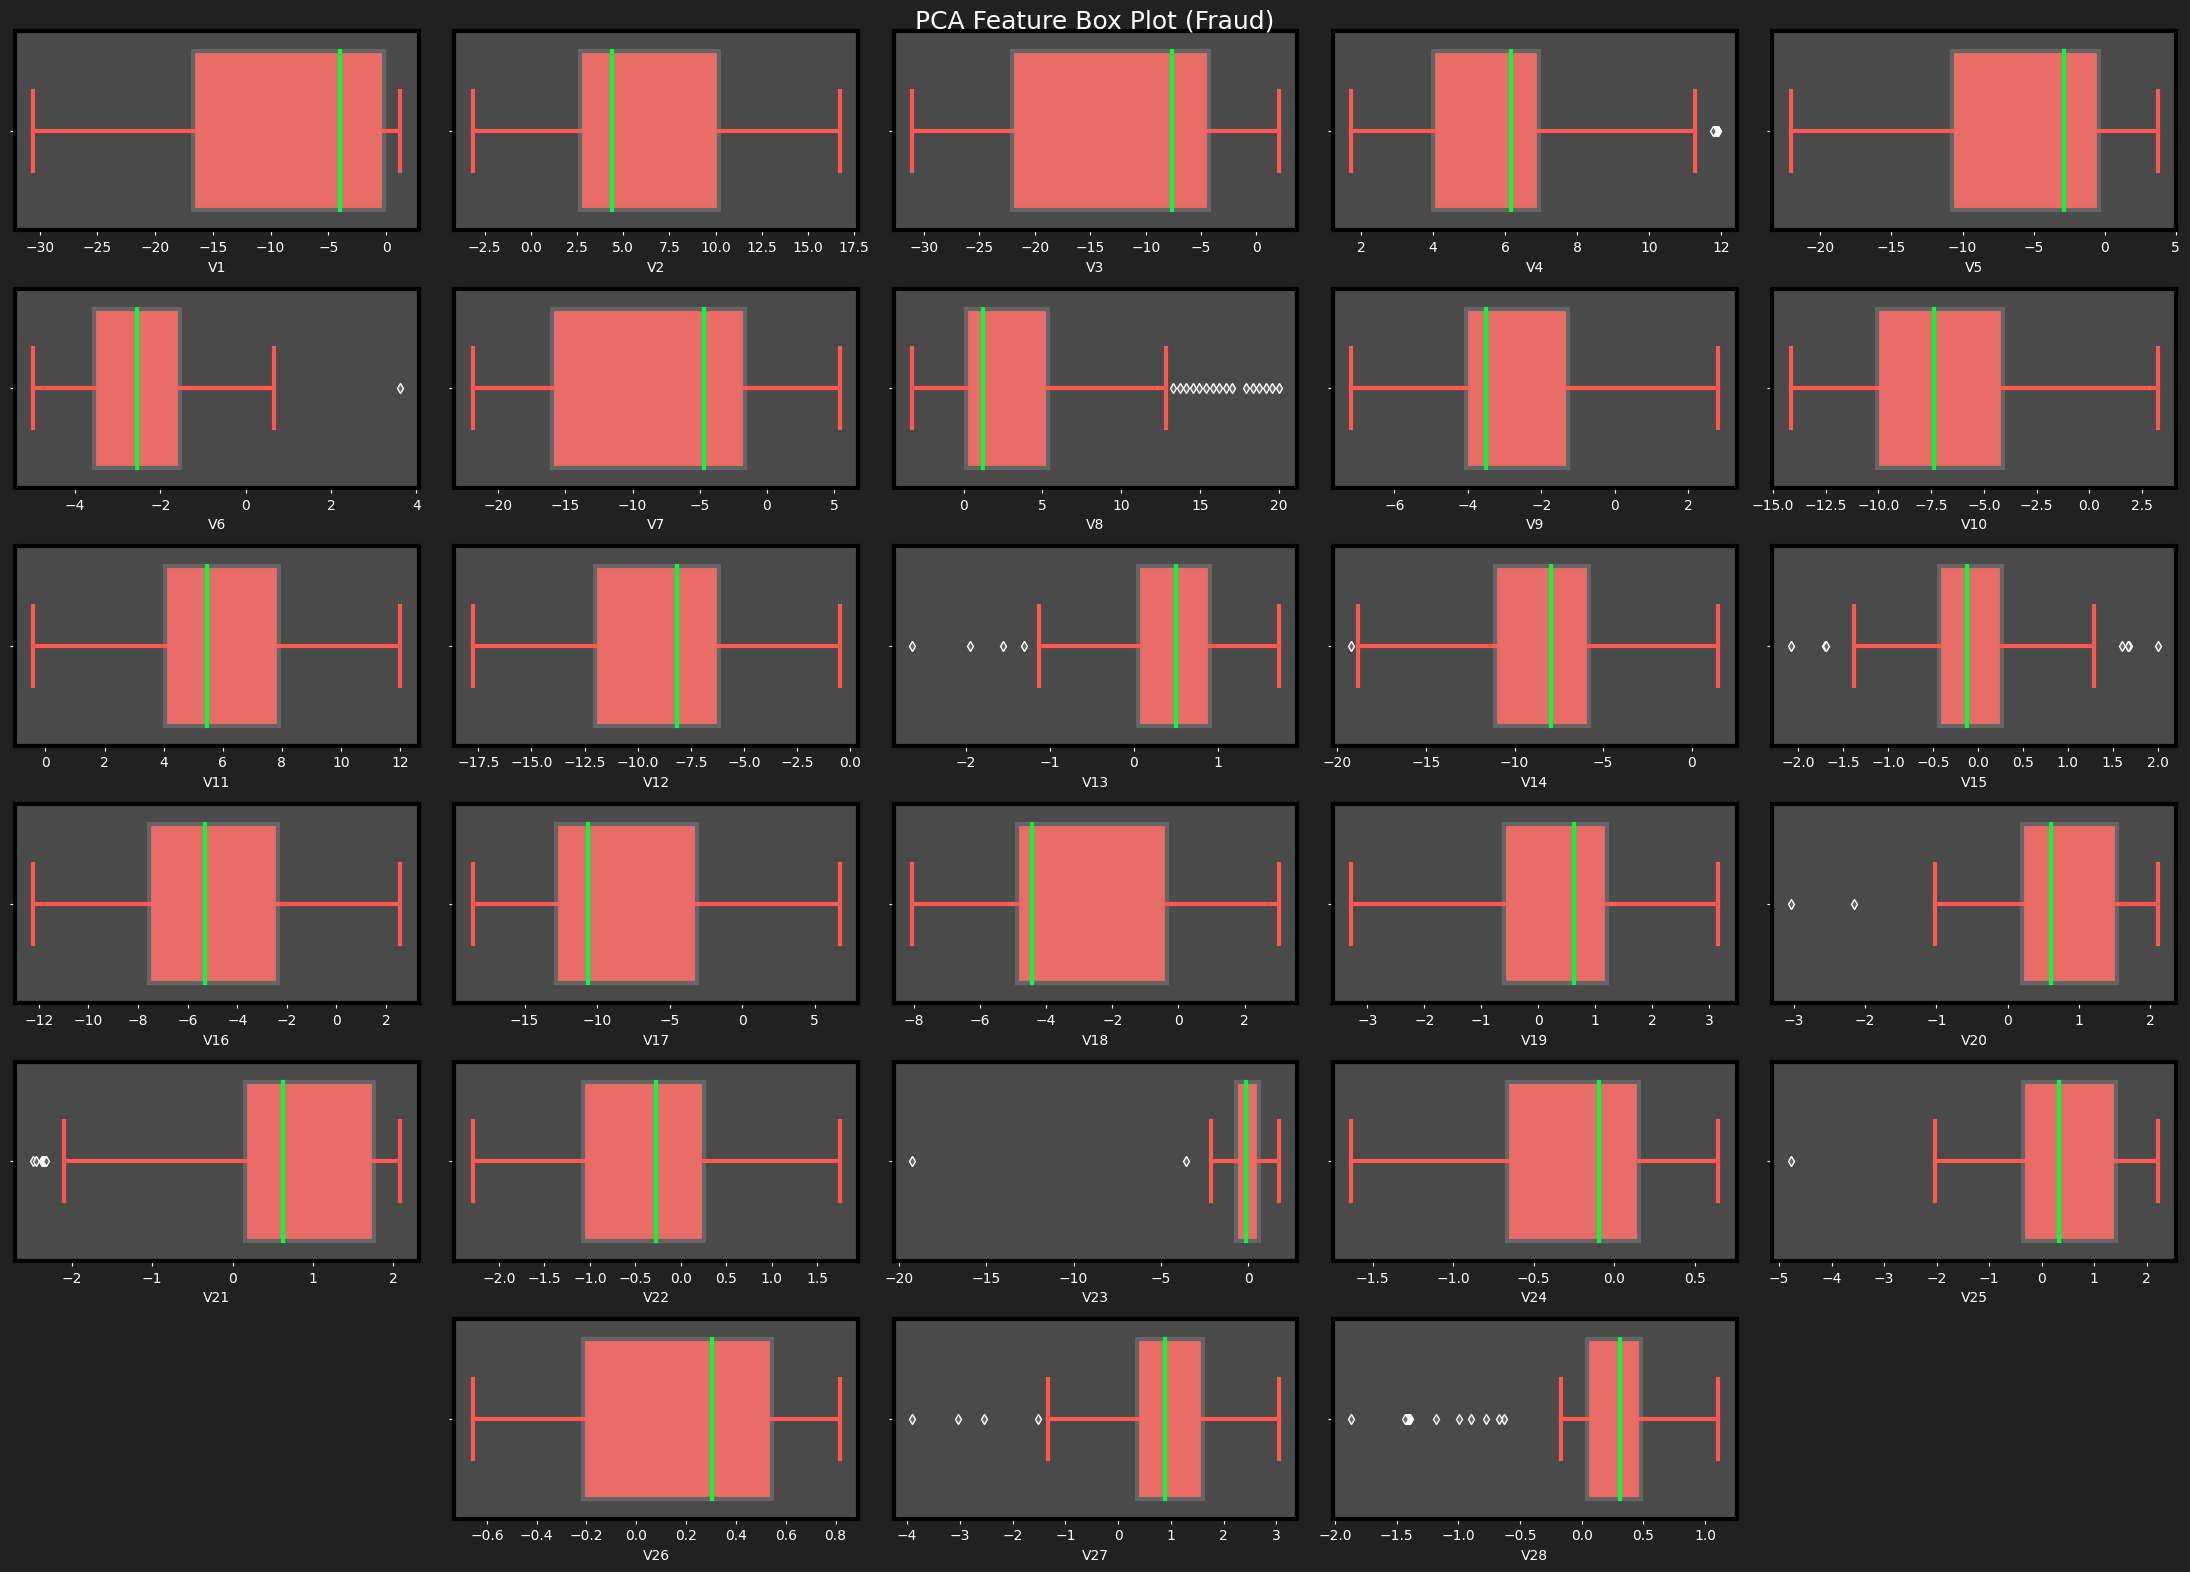

In [17]:
fig = plt.figure(figsize=(22, 16))

# Plot parameters
plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["xtick.color"] = colors[5]
plt.rcParams["ytick.color"] = colors[5]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])
plt.suptitle("PCA Feature Box Plot (Fraud)")

# Subplots
for idx, i in enumerate(df_eda.columns[1:-3]):
    # for centering last subplots
    if idx+1 >= 26:
        idx+=1

    plt.subplot(6, 5, idx+1)
    sns.boxplot(x=df_eda[df_eda['Class'] == 1][i], linewidth=3, palette=[colors[0]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[0]}, capprops={'color':colors[0]}, flierprops=dict(markeredgecolor=colors[5]))

**Let's see correlation among features.**

<Axes: title={'center': 'Features Correlation Plot'}>

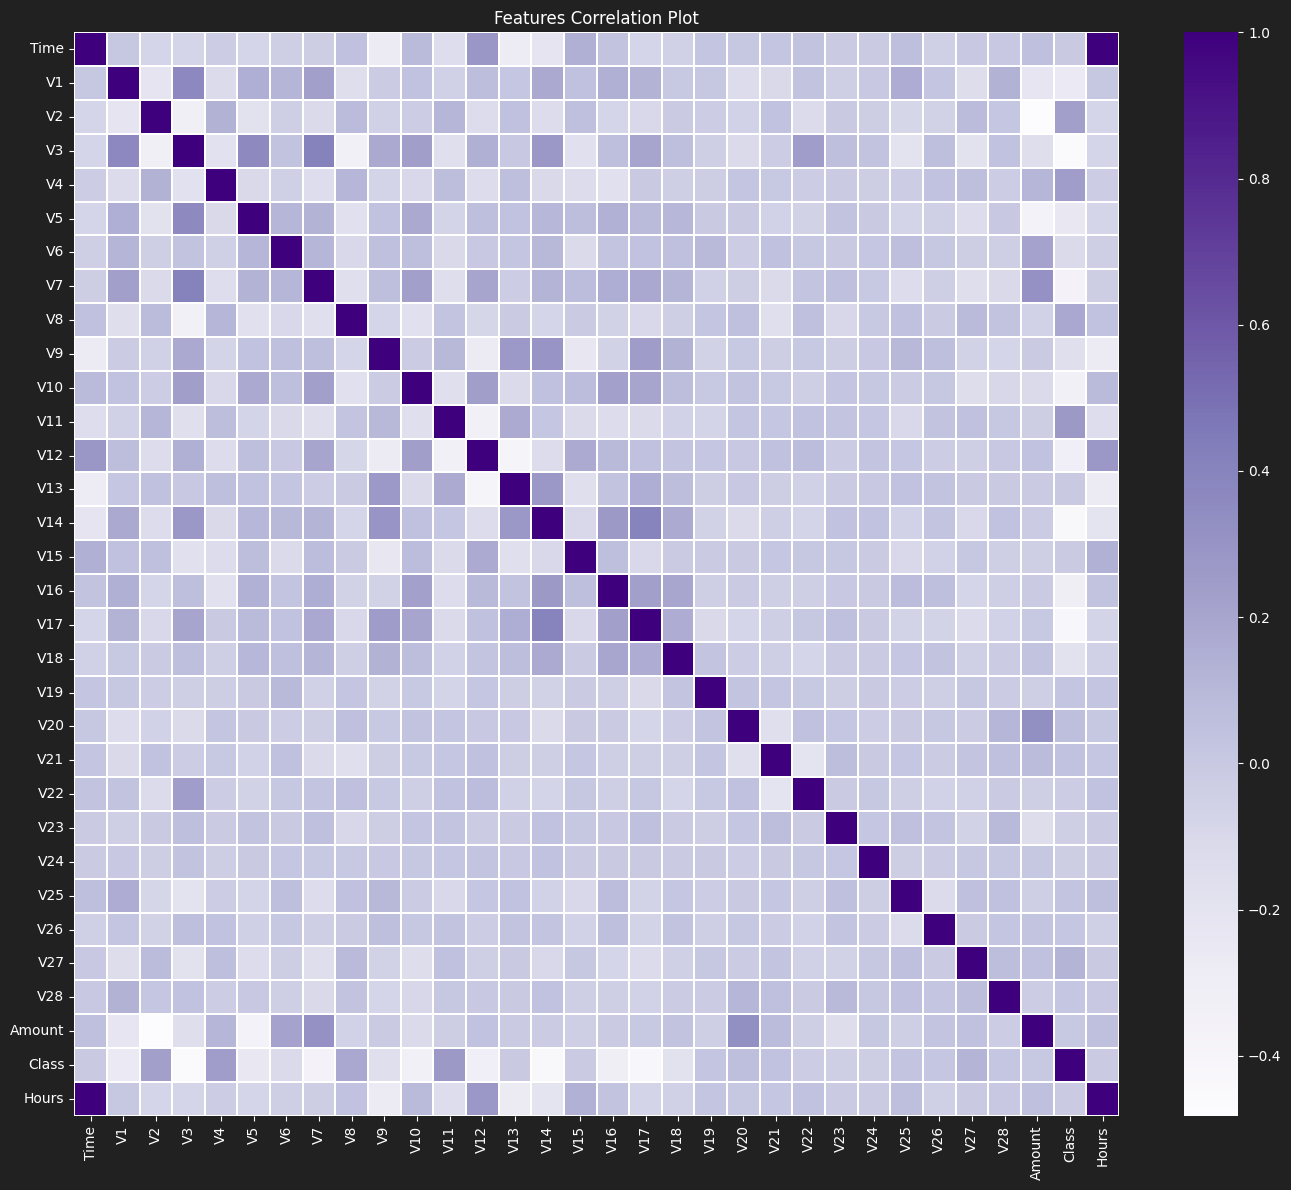

In [18]:
# Correlation plot
fig = plt.figure(figsize = (14,12))

plt.rcParams["figure.autolayout"] = True
plt.rcParams["axes.facecolor"] = colors[3]
plt.rcParams["axes.labelcolor"] = colors[5]
fig.patch.set_facecolor(colors[4])

plt.title('Features Correlation Plot')
corr = df_eda.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Purples")

<div style="border-left: 5px solid;
            border-color: rgba(180, 140, 220, 1);
            border-radius: 3px 0px 0px 3px;
            background-color: rgba(180, 140, 220, 0.2)">
            <h3 style="background-color: rgba(180, 140, 220, 0.2);
                       border-radius: 0px 5px 0px 0px;
                       padding:15px">
            📝 Insights
            </h3>
    <ul>
        <li style="padding:0px 0px 5px 0px;">The PCA features have almost no correlation among themselves.</li>
        <li style="padding:0px 0px 5px 0px;">Transaction amount has a direct correlation with <b>V7 ,V20, V6, V4, V21</b> and an inverse correlation with <b>V2, V5</b> and <b>V1</b>.</li>
        <li style="padding:0px 0px 5px 0px;">Transaction Time has some inverse correlation with <b>V3, V11</b> and <b>V25</b> whereas the distributions for fradulent transaction are mostly <b>skewed</b> and are <b>wide spread</b>.</li>
    </ul>
            
</div>

## Feature Dashboard

interactive(children=(Dropdown(description='feature', options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7…

interactive(children=(Dropdown(description='feature1', index=1, options=('Time', 'V1', 'V2', 'V3', 'V4', 'V5',…

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.



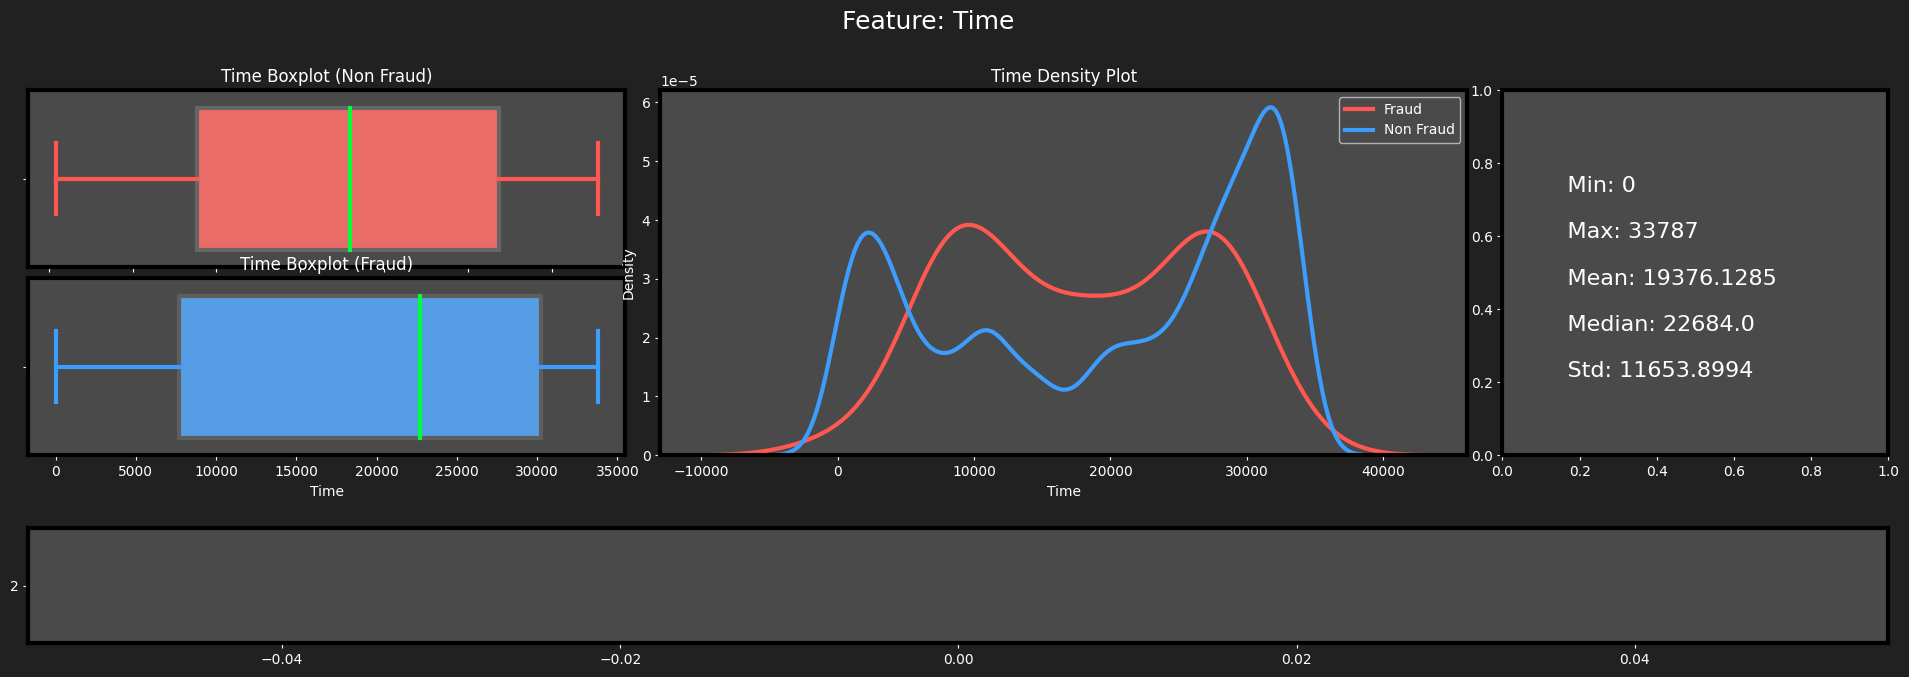

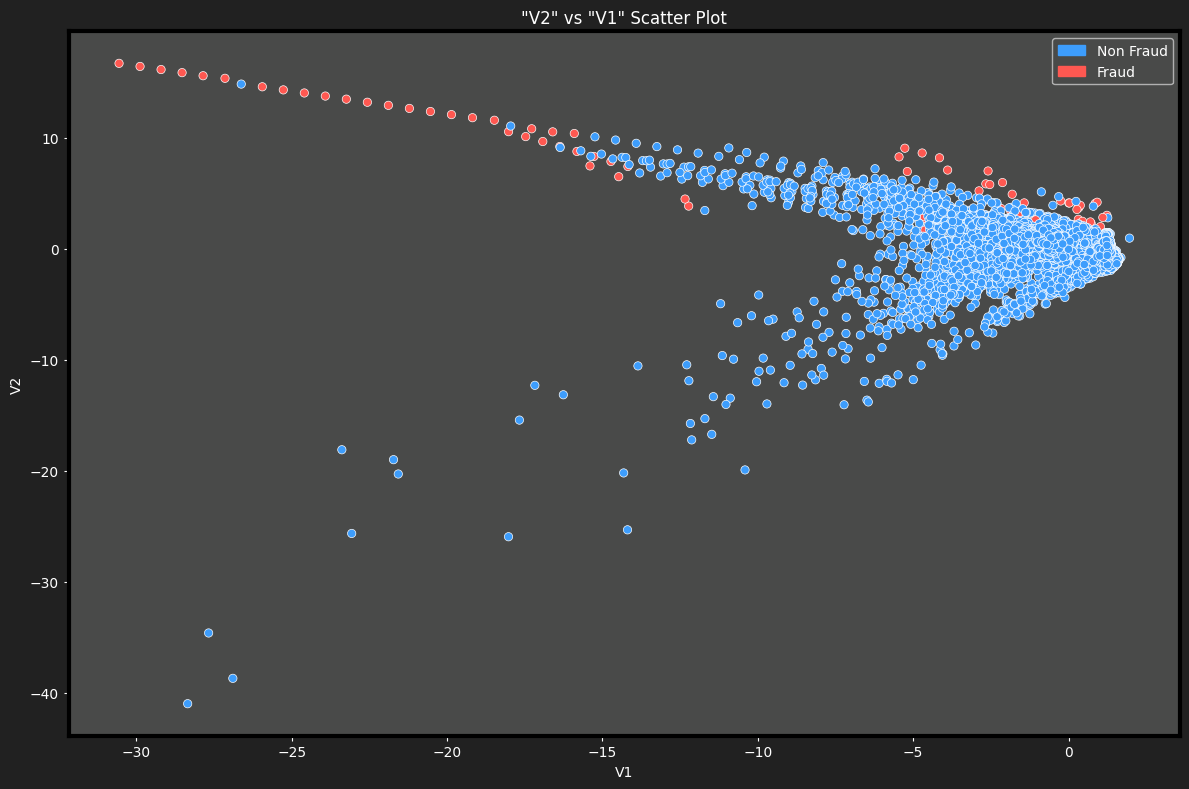

In [19]:
# Features list
features = list(df_eda.columns)
features.remove('Class')
features.remove('Hours')

#################### widget 1 ####################
@widgets.interact(feature=features)
def display_feature_plots(feature="Time"):
    # Plot parameters
    fig = plt.figure(figsize = (24, 8))

    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.facecolor"] = colors[3]
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.color"] = colors[5]
    plt.rcParams["ytick.color"] = colors[5]
    plt.rcParams["axes.labelcolor"] = colors[5]
    fig.patch.set_facecolor(colors[4])
    plt.suptitle(f"Feature: {feature}")

    # Subplot axes
    ax1 = plt.subplot2grid(shape=(10, 9), loc=(0, 0), rowspan=3, colspan=3)
    ax2 = plt.subplot2grid(shape=(10, 9), loc=(3, 0), rowspan=3, colspan=3)
    ax3 = plt.subplot2grid(shape=(10, 9), loc=(0, 3), rowspan=6, colspan=4)
    ax4 = plt.subplot2grid(shape=(10, 9), loc=(0, 7), rowspan=6, colspan=2)
    ax5 = plt.subplot2grid(shape=(10, 9), loc=(7, 0), rowspan=2, colspan=9)

    ##### Axis 1 #####
    sns.boxplot(x=df_eda[df_eda['Class'] == 1][feature], linewidth=3, palette=[colors[0]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[0]}, capprops={'color':colors[0]}, flierprops=dict(markeredgecolor=colors[5]), ax=ax1)
    ax1.set_title(f"{feature} Boxplot (Non Fraud)")

    ##### Axis 2 #####
    sns.boxplot(x=df_eda[df_eda['Class'] == 0][feature], linewidth=3, palette=[colors[1]], medianprops={'color':colors[7]}, whiskerprops={'color':colors[1]}, capprops={'color':colors[1]}, flierprops=dict(markeredgecolor=colors[5]), ax=ax2)
    ax2.set_title(f"{feature} Boxplot (Fraud)")

    ##### Axis 3 #####
    sns.kdeplot(x=df_eda[df_eda['Class'] == 1][feature], linewidth=3, color=colors[0], ax=ax3)
    sns.kdeplot(x=df_eda[df_eda['Class'] == 0][feature], linewidth=3, color=colors[1], ax=ax3)
    ax3.set_title(f"{feature} Density Plot")
    ax3.legend(labels=['Fraud', 'Non Fraud'])

    ##### Axis 4 #####
    ax4.text(-0.2, 0.15, f"""
                    Min: {round(df_eda[feature].min(), 4)}\n
                    Max: {round(df_eda[feature].max(), 4)}\n
                    Mean: {round(df_eda[feature].mean(), 4)}\n
                    Median: {round(df_eda[feature].median(), 4)}\n
                    Std: {round(df_eda[feature].std(), 4)}
                    """, fontsize=16)

    ##### Axis 5 #####
    # Ignoring time features
    value=np.nan if feature in ['Time'] else 100

    bar1 = sns.barplot(x=[value], y=[ol_df2.index.tolist().index(feature)], orient='h', color=colors[1], ax=ax5)
    bar2 = sns.barplot(x=[ol_df2['Percent 1'][feature]*100], y=[ol_df2.index.tolist().index(feature)], orient='h', color=colors[0], ax=ax5)

    # Annotation and legend
    if feature not in ['Time']:
        bar1.text(0.1,0.1,f"{round(ol_df2['Percent 1'][feature]*100, 2)} %", fontsize=18)
        bar2.text(99.9,0.1,f"{round(ol_df2['Percent 0'][feature]*100, 2)} %", fontsize=18)
        right_bar = mpatches.Patch(color=colors[1], label='Non Fraud')
        left_bar = mpatches.Patch(color=colors[0], label='Fraud')
        ax5.legend(handles=[right_bar, left_bar], loc='center')
        ax5.set_title(f"Percent Proportion of outliers in {feature} Feature")


#################### widget 2 ####################
@widgets.interact(feature1=features, feature2=features)
def display_feature_plots(feature1="V1", feature2="V2"):
    #plot parameters
    fig = plt.figure(figsize = (12, 8))

    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["axes.facecolor"] = colors[3]
    plt.rcParams["axes.linewidth"] = 3
    plt.rcParams["xtick.color"] = colors[5]
    plt.rcParams["ytick.color"] = colors[5]
    plt.rcParams["axes.labelcolor"] = colors[5]
    fig.patch.set_facecolor(colors[4])

    sns.scatterplot(x=df_eda[feature1], y=df_eda[feature2], hue=df_eda['Class'], palette=[colors[1], colors[0]])
    scatter0 = mpatches.Patch(color=colors[1], label='Non Fraud')
    scatter1 = mpatches.Patch(color=colors[0], label='Fraud')
    plt.legend(handles=[scatter0, scatter1])
    plt.xlabel(f"{feature1}")
    plt.ylabel(f"{feature2}")
    plt.title(f'"{feature2}" vs "{feature1}" Scatter Plot')

**Unfortunately some ipywidgets seems to not work on Kaggle kernels!**

## Machine Learning Model

In [37]:
df_eda.dropna(inplace=True)

class_0_% is: 99.65940318148392
class_0_% is: 0.3405968185160816


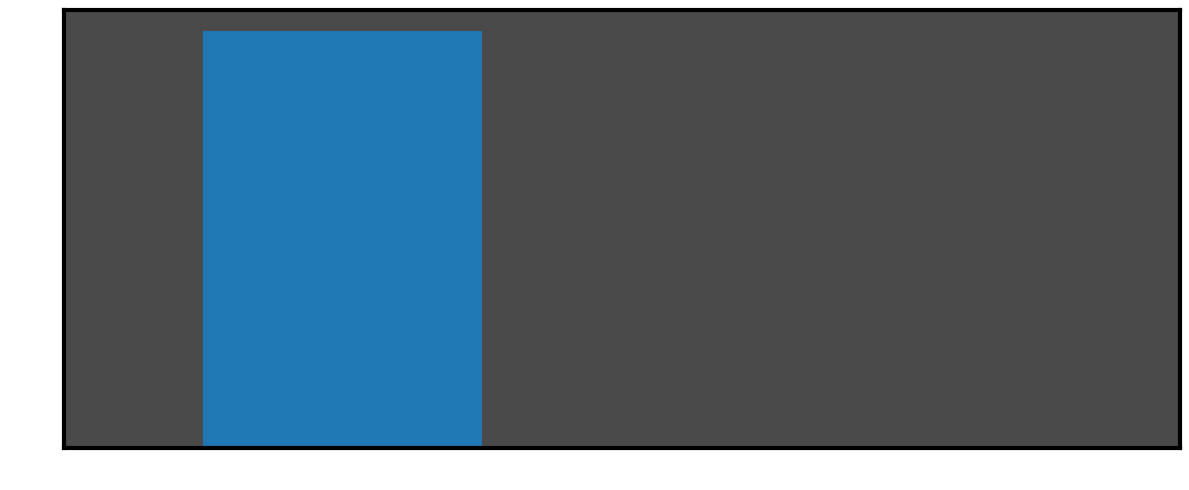

In [38]:
df_eda['Class'].value_counts().plot(kind='bar', figsize=(12, 5))
print('class_0_% is: {}'.format(100*(df_eda['Class'].value_counts()[0]/len(df_eda))))
print('class_0_% is: {}'.format(100*(df_eda['Class'].value_counts()[1]/len(df_eda))))

In [39]:
X= df_eda.drop('Class', axis=1)
y= df_eda['Class']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Before SMOT

In [41]:
from sklearn.linear_model import LogisticRegression
before_lr = LogisticRegression()
before_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [42]:
before_y_pred_lr = before_lr.predict(X_test)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
before_knn = KNeighborsClassifier(n_neighbors = 5)
before_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
before_y_pred_knn = before_knn.predict(X_test)

## After SMOT

In [46]:
## SMOTE is applying on training set only
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

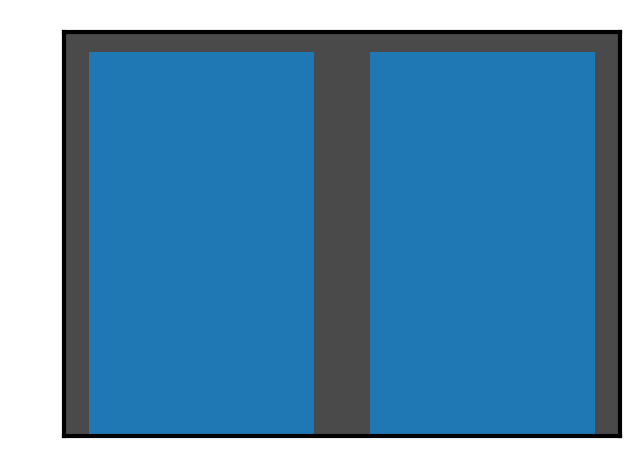

In [47]:
## Now, visualize the class_distribution of y_resampled after applying SMOTE
categories = [0,1]
values = [len(y_resampled[y_resampled == 0]), len(y_resampled[y_resampled == 1])]
plt.bar(categories, values)
plt.title('Class_Distribution after applying SMOTE')
plt.show()

In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [51]:
y_pred_lr = lr.predict(X_test)

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_resampled, y_resampled)

KNeighborsClassifier()

In [53]:
y_pred_knn = knn.predict(X_test)

In [54]:
#Performing the dataset into ml model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [55]:
y_pred_rf= rfc.predict(X_test)

## Compare TP, FP, TN, FN before SMOTE and after SMOTE

In [57]:
## confusion matrics
from sklearn.metrics import confusion_matrix, accuracy_score

tn, fp, fn, tp = confusion_matrix(y_test, before_y_pred_lr).ravel()
print('********* Before SMOTE, for LogisticRegression ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, before_y_pred_lr)))
print()

tn, fp, fn, tp = confusion_matrix(y_test, before_y_pred_knn).ravel()
print('********* Before SMOTE, for KNN ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, before_y_pred_knn)))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print('********* After SMOTE, for LogisticRegression ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_lr)))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print('********* After SMOTE, for KNN ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_knn)))
print()

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print('********* After SMOTE, for RF ***********')
print('True Negatives: {}\nFalse Positives: {}\nFalse Negatives: {}\nTrue Positives: {}\nAccuracy_Score: {}'.format(tn, fp, fn, tp, 100* accuracy_score(y_test, y_pred_rf)))

********* Before SMOTE, for LogisticRegression ***********
True Negatives: 5141
False Positives: 8
False Negatives: 7
True Positives: 12
Accuracy_Score: 99.70975232198143

********* Before SMOTE, for KNN ***********
True Negatives: 5149
False Positives: 0
False Negatives: 19
True Positives: 0
Accuracy_Score: 99.63235294117648

********* After SMOTE, for LogisticRegression ***********
True Negatives: 5091
False Positives: 58
False Negatives: 2
True Positives: 17
Accuracy_Score: 98.83900928792569

********* After SMOTE, for KNN ***********
True Negatives: 4970
False Positives: 179
False Negatives: 5
True Positives: 14
Accuracy_Score: 96.43962848297214

********* After SMOTE, for RF ***********
True Negatives: 5148
False Positives: 1
False Negatives: 2
True Positives: 17
Accuracy_Score: 99.94195046439629


## Conclusion:

1. For LogisitcRegression:
*    True Positives are increased(from 58 to 86),
*    True Negatives are increased(from 56641 to 55189)
*    False Positives are increased(from 10 to 1462)
*    False Negatives are reduced(from 37 to 21).
2. For KNN:
*   True Positives are increased(from 74 to 79),
*   True Negatives are reduced(from 56645 to 56552)
*   False Positives are increased(from 6 to 99)
*   False Negatives are reduced(from 21 to 16).

## So, the model Random Forest shows highest accuracy 99.94% 🏆